In [1]:
import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from scipy.ndimage import rotate

from utils.shortcut import quick_get_roi

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline


/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data_dir = Path(os.getenv('DATASET_DIR')) / 'phase-2'
data_dir


PosixPath('/Users/lucyxu/PycharmProjects/datasets/phase-2')

In [3]:
image_paths = list(data_dir.glob('00008026.jpg'))
image_path = image_paths[0]

image_path.name


'00008026.jpg'

/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/yolov5/utils/plots.py:475: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xyxy = torch.tensor(xyxy).view(-1, 4)


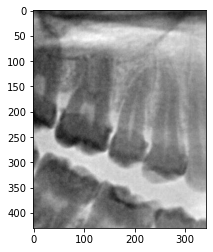

In [4]:
im_g, flag, tooth_position = quick_get_roi(image_path, roi_index=0)

# margin = 50
plt.gray()
plt.imshow(1 - im_g, cmap='gray')

plt.show()


# Recovery rotated point

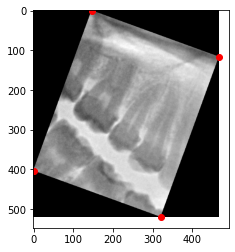

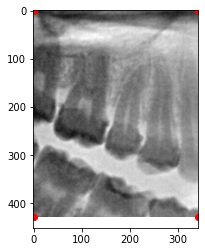

In [10]:
from scipy import special

theta = 20
s, c = special.sindg(theta), special.cosdg(theta)
rot_matrix = np.array([[c, -s],
                       [s, c]])

h, w = im_g.shape

# Fake points generate
if theta > 0:
    p1 = np.array([0, w * s]).astype(int)
    p2 = np.array([w * c, 0]).astype(int)
    p3 = np.array([w * c + h * s, h * c]).astype(int)
    p4 = np.array([h * s, w * s + h * c]).astype(int)
else:
    s = abs(s)
    p1 = np.array([h * s, 0]).astype(int)
    p2 = np.array([h * s + w * c, w * s]).astype(int)
    p3 = np.array([w * c, w * s + h * c]).astype(int)
    p4 = np.array([0, h * c]).astype(int)

offset = rot_matrix @ p1

points_rotate = np.vstack([p1, p2, p3, p4])
points_recovery = np.vstack([p1, p2, p3, p4])

points_recovery = points_recovery.transpose()
points_recovery = rot_matrix @ points_recovery
points_recovery = points_recovery - offset[:, None]
points_recovery = points_recovery.transpose().astype(int)

# Visualization
im_r = rotate(im_g, theta)
plt.imshow(1 - im_r)

for i in points_rotate:
    plt.plot(*i, color='red', marker='o')
plt.show()

plt.imshow(1 - im_g)
for i in points_recovery:
    plt.plot(*i, color='red', marker='o')
plt.show()


# Rotate point

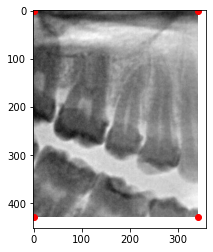

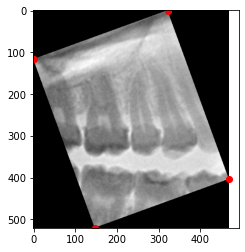

In [8]:
theta = 20
s, c = special.sindg(theta), special.cosdg(theta)
rot_matrix = np.array([[c, s],
                       [-s, c]])

h, w = im_g.shape

if theta > 0:
    p1 = np.array([0, w * s]).astype(int)
else:
    s = abs(s)
    p1 = np.array([h * s, 0]).astype(int)

offset = p1 * -1

# Fake points generate
p1 = np.array([0, 0]).astype(int)
p2 = np.array([0, h]).astype(int)
p3 = np.array([w, h]).astype(int)
p4 = np.array([w, 0]).astype(int)

points = np.vstack([p1, p2, p3, p4])
points_rotate = np.vstack([p1, p2, p3, p4])

points_rotate = points_rotate.transpose()
points_rotate = rot_matrix @ points_rotate
points_rotate = points_rotate - offset[:, None]
points_rotate = points_rotate.transpose().astype(int)

# Visualization
im_r = rotate(im_g, theta)

plt.imshow(1 - im_g)
for i in points:
    plt.plot(*i, color='red', marker='o')
plt.show()

plt.imshow(1 - im_r)

for i in points_rotate:
    plt.plot(*i, color='red', marker='o')
plt.show()
